# MINI PROJECT 3: CREDIT CARD FRAUD DETECTION  15 July 2022 
1.It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The data question we are looking at seeks to build a Classification Model to identify fraudulent credit card transactions

2.The datasets contains transactions made by credit cards in September 2013 by european cardholders.

3.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

4.It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

5.Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

6.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import pandas_profiling

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import itertools

In [20]:
# Extract 100,000 out of 284,807 rows with same proportion of fraud (representative sample)

no_of_rows = 100000
card = 'creditcard.csv'
df = pd.read_csv(card, nrows = no_of_rows)

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)
# Data types
print('\n- Data types')
print(df.dtypes)
# Domains, Intervals
print('\n- Domains, Intervals')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (c, df[c].min(), df[c].max()))
    print('    values: %s' % x)
print('\n- Nulls')
for c in df.columns:
    print('  - %-16s: Nulls: %d' % (c, df[c].isna().sum()))   

- Number of features: 31
  - Time
  - V1
  - V2
  - V3
  - V4
  - V5
  - V6
  - V7
  - V8
  - V9
  - V10
  - V11
  - V12
  - V13
  - V14
  - V15
  - V16
  - V17
  - V18
  - V19
  - V20
  - V21
  - V22
  - V23
  - V24
  - V25
  - V26
  - V27
  - V28
  - Amount
  - Class

- Data types
Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- Domains, Intervals
  - Time            : min: 0, max: 67375
    values: [    0     1     2 ... 67373 67374 67375]
  - V1              : min: 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  int64  
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21     100

In [21]:
# find frequency of Fraud vs No Fraud

df['Class'].value_counts(normalize= True)

0    0.99777
1    0.00223
Name: Class, dtype: float64

In [25]:
# Find the proportion of Fraud vs No Fraud

df['Class'].value_counts()

0    99777
1      223
Name: Class, dtype: int64

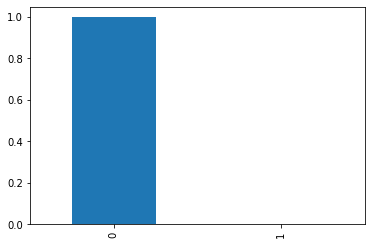

In [26]:
df['Class'].value_counts(normalize=True).plot(kind='bar');

In [29]:
# Transaction Amount in this period

result= df.groupby('Class')['Amount'].sum()
print(result)

Class
0    9770216.06
1      25906.10
Name: Amount, dtype: float64


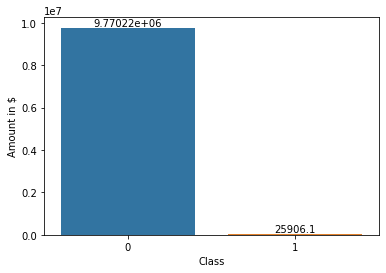

In [30]:
# plot the result
ax= sns.barplot(x = result.index, y = result.values);

#ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[0])
ax.set_ylabel('Amount in $');

In [31]:
df['Time']

0            0
1            0
2            1
3            1
4            2
         ...  
99995    67374
99996    67374
99997    67374
99998    67374
99999    67375
Name: Time, Length: 100000, dtype: int64

In [32]:
def facetgridplot(data, var):
    facet = sns.FacetGrid(data, hue="Class", aspect=3)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, data[var].max()))
    facet.add_legend()
    plt.show();

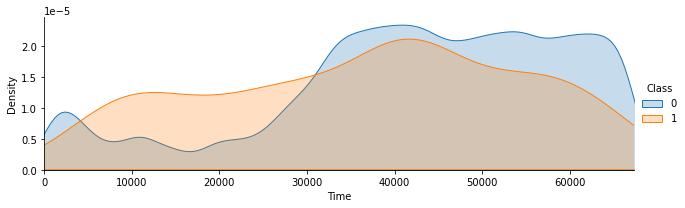

In [33]:
# OBSERVATION: FRAUD seems to strike at the wee hours of the day

facetgridplot(df, 'Time')  

In [34]:
df.describe().T[['min', 'max']]

,min,max
Time,0.000000,67375.000000
V1,-56.407510,1.960497
V2,-72.715728,18.902453
V3,-33.680984,4232.000000
V4,-5.172595,16.715537
V5,-42.147898,34.801666
V6,-26.160506,22.529298
V7,-31.764946,36.677268
V8,-73.216718,20.007208
V9,-9.283925,1221.000000


In [35]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.011340,-0.056191,-0.004803,-0.024425,-0.041707,-0.008165,0.003923,0.017645,-0.072552,...,0.003824,0.012507,0.002984,-0.000999,0.005493,0.000343,-0.015835,-0.006777,0.039062,-0.015959
V1,-0.011340,1.000000,0.061984,0.024207,-0.067911,0.016802,0.068678,0.080947,-0.017821,-0.012965,...,-0.015065,-0.056991,-0.076777,-0.012036,0.192313,0.020981,-0.025844,0.139250,-0.253705,-0.146554
V2,-0.056191,0.061984,1.000000,-0.008049,0.045216,-0.049375,0.018915,-0.025993,0.026238,-0.001871,...,-0.023983,-0.022753,0.002714,-0.023155,-0.091261,-0.025983,0.005383,0.009913,-0.556543,0.118397
V3,-0.004803,0.024207,-0.008049,1.000000,-0.005689,0.020122,-0.007253,0.019787,-0.014682,0.003739,...,0.002818,0.021084,0.005766,0.004243,-0.017153,0.000658,-0.007400,0.003135,-0.023616,-0.030325
V4,-0.024425,-0.067911,0.045216,-0.005689,1.000000,-0.005706,-0.040515,-0.027644,0.051057,0.013970,...,0.016729,0.036955,-0.011077,-0.000026,-0.001435,-0.022516,0.047171,-0.002884,0.094285,0.166205
V5,-0.041707,0.016802,-0.049375,0.020122,-0.005706,1.000000,0.035415,-0.048473,-0.028283,0.012551,...,-0.050119,-0.080694,0.016921,-0.016370,-0.008683,-0.043005,-0.025447,0.001914,-0.402956,-0.142990
V6,-0.008165,0.068678,0.018915,-0.007253,-0.040515,0.035415,1.000000,0.072779,-0.044830,0.010599,...,0.013537,0.040517,-0.018488,-0.002784,0.045418,0.002669,-0.012591,-0.013690,0.211980,-0.068310
V7,0.003923,0.080947,-0.025993,0.019787,-0.027644,-0.048473,0.072779,1.000000,-0.033695,0.014020,...,0.019202,-0.040671,0.079240,0.000201,-0.094228,-0.035176,-0.099811,-0.042387,0.385942,-0.240855
V8,0.017645,-0.017821,0.026238,-0.014682,0.051057,-0.028283,-0.044830,-0.033695,1.000000,-0.009812,...,0.051576,0.022170,-0.006252,0.001173,0.014624,0.006713,0.011288,0.029974,-0.098838,0.104107
V9,-0.072552,-0.012965,-0.001871,0.003739,0.013970,0.012551,0.010599,0.014020,-0.009812,1.000000,...,0.000190,0.012091,-0.013852,0.003611,0.035462,0.028738,-0.009576,-0.006796,-0.006390,-0.033582


### CREATE MODEL

In [36]:
predictor_columns = [c for c in df.columns if c != 'Class']
target_column = 'Class'

# Load the dataset as a pandas data frame
X = pd.DataFrame(df, columns = predictor_columns)
y = df[target_column]

In [37]:
# SPLIT DATA INTO TRAINING AND TEST DATA 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=None, stratify=y, random_state=0)

In [38]:
# HANDLE IMBALANCED TRAINING DATA

from imblearn.over_sampling import SMOTE 

model = SMOTE(random_state=42)
X_train, y_train = model.fit_resample(X_train, y_train)  # this gives the Resampled X and Y-training data

In [39]:
#check new no of rows

print(len(X_train), len(X_test))

149666 25000


In [40]:
# Confirm Training Data is now balanced

y_train.value_counts(normalize= True)  

0    0.5
1    0.5
Name: Class, dtype: float64

In [41]:
# Check that test data remains unbalanced 

y_test.value_counts(normalize= True)  

0    0.99776
1    0.00224
Name: Class, dtype: float64

In [42]:
X_train.shape

(149666, 30)

### USE LOGISTICS REGRESSION

In [19]:
# OBSERVATION:  PRECISION IS POOR EVEN THOUGH RECALL IS HIGH

model = LogisticRegression(solver='lbfgs', random_state=1) 
model.fit(X_train, y_train)   
y_pred= model.predict(X_test) 
model.predict_proba(X_test)  

print(classification_report(y_test,y_pred))


#print(precision_recall_fscore_support(y_test, y_pred, average=None,labels=[1]))
#train_accuracy = accuracy_score(y_train, model.predict(X_train))
#test_accuracy = accuracy_score(y_test, model.predict(X_test))
#precision = precision_score(y_test, model.predict(X_test), labels=1)
#recall = recall_score(y_test, model.predict(X_test), labels=1)
#f1 = f1_score(y_test, model.predict(X_test), labels = 1)
#auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], labels = 1)

#print(train_accuracy)
#print(test_accuracy)
#print(precision)
#print(recall)
#print(f1)
#print(auc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24944
           1       0.10      0.93      0.17        56

    accuracy                           0.98     25000
   macro avg       0.55      0.95      0.58     25000
weighted avg       1.00      0.98      0.99     25000



C:\Users\yeong\anaconda3\envs\IOD_9thMay2022\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(solver = "liblinear" ), lr_params, cv=5, verbose=2, error_score ='raise', scoring='f1_macro' )
lr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, penalty=l1; total time=   3.2s
[CV] END ....................................C=1, penalty=l1; total time=   8.4s
[CV] END ....................................C=1, penalty=l1; total time=   3.5s
[CV] END ....................................C=1, penalty=l1; total time=   3.4s
[CV] END ....................................C=1, penalty=l1; total time=   3.4s
[CV] END ....................................C=1, penalty=l2; total time=   1.4s
[CV] END ....................................C=1, penalty=l2; total time=   1.0s
[CV] END ....................................C=1, penalty=l2; total time=   1.1s
[CV] END ....................................C=1, penalty=l2; total time=   1.3s
[CV] END ....................................C=1, penalty=l2; total time=   2.0s
[CV] END ...................................C=10, penalty=l1; total time=   3.4s
[CV] END ...................................C=10,

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1_macro', verbose=2)

In [22]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 1, 'penalty': 'l1'}
0.9793637338813698


In [25]:
model = LogisticRegression(solver='liblinear',penalty='l1', random_state=1) 
model.fit(X_train, y_train)   
y_pred= model.predict(X_test) 
model.predict_proba(X_test)  

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24944
           1       0.22      0.91      0.35        56

    accuracy                           0.99     25000
   macro avg       0.61      0.95      0.67     25000
weighted avg       1.00      0.99      0.99     25000



# USE RANDOM FOREST

In [26]:
#OBSERVATION:  GOOD BALANCE OF RECALL AND PRECISION BUT STILL FALL SHORT SLIGHTLY OF REQUIREMENT

clf2 = RandomForestClassifier(n_estimators = 7, random_state = 1, max_features=0.8, n_jobs=-1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print(precision_recall_fscore_support(y_test, y_pred, average=None,labels=[1]))

print(classification_report(y_test,y_pred))

Accuracy: 0.9994
(array([0.84745763]), array([0.89285714]), array([0.86956522]), array([56], dtype=int64))
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       0.85      0.89      0.87        56

    accuracy                           1.00     25000
   macro avg       0.92      0.95      0.93     25000
weighted avg       1.00      1.00      1.00     25000



In [27]:
#GRIDSEARCH ON RANDOM FOREST

rf_params = {
    'n_estimators': [5, 50,100,200],
    'criterion' : ['gini', 'entropy']
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=1, bootstrap=True, oob_score=True), rf_params, cv=5, verbose=3, 
                     n_jobs=-1, scoring = ['recall', 'precision'], refit = 'recall', return_train_score=True)
rf_gs.fit(X_train, y_train)

# USE TQDM to check progress of processing
from tqdm import tqdm
for i in tqdm (range(2)):     # tqdm tracks progress of processing, useful in running loops
    best_svc = rf_gs.best_estimator_
    print(rf_gs.best_params_)
    print(rf_gs.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


100%|██████████| 2/2 [00:00<?, ?it/s]

{'criterion': 'gini', 'n_estimators': 200}
0.9999866372686578
{'criterion': 'gini', 'n_estimators': 200}
0.9999866372686578


In [29]:
clf2 = RandomForestClassifier(n_estimators = 200, random_state = 1, max_features=0.8, n_jobs=-1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       0.87      0.86      0.86        56

    accuracy                           1.00     25000
   macro avg       0.94      0.93      0.93     25000
weighted avg       1.00      1.00      1.00     25000



# USE ADA BOOST

In [31]:
# OBSERVATION:  GOOD BALANCE OF RECALL AND PRECISION BUT STILL FALL SHORT SLIGHTLY OF REQUIREMENT

clf4 = AdaBoostClassifier(n_estimators=50, random_state=1)
scores = cross_val_score(clf4, X, y, cv=5)
scores.mean()

clf4.fit(X_train, y_train)
print(clf4.score(X_test, y_test))
print(clf4.score(X_train, y_train))

print(precision_recall_fscore_support(y_test, y_pred, average=None,labels=[1]))

print(classification_report(y_test,y_pred))

0.9928
0.9914676680074299
(array([0.87272727]), array([0.85714286]), array([0.86486486]), array([56], dtype=int64))
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24944
           1       0.87      0.86      0.86        56

    accuracy                           1.00     25000
   macro avg       0.94      0.93      0.93     25000
weighted avg       1.00      1.00      1.00     25000



# USE XG BOOST

In [34]:
%%time
# OBSERVATION: GOOD BALANCE OF RECALL AND PRECISION BUT STILL FALL SHORT SLIGHTLY OF REQUIREMENT

clf5 = XGBClassifier(booster='gbtree',  
                    learning_rate=0.1, n_estimators=100, random_state=1, n_jobs=-1)
clf5.fit(X_train, y_train)

y_pred = clf5.predict(X_test)
predictions = [round(value) for value in y_pred]

clf5.score(X_test, y_test)
clf5.score(X_train,y_train)

print(precision_recall_fscore_support(y_test, y_pred, average=None,labels=[1]))

print(classification_report(y_test,y_pred, labels=[1])) 

(array([0.79365079]), array([0.89285714]), array([0.84033613]), array([56], dtype=int64))
              precision    recall  f1-score   support

           1       0.79      0.89      0.84        56

   micro avg       0.79      0.89      0.84        56
   macro avg       0.79      0.89      0.84        56
weighted avg       0.79      0.89      0.84        56

CPU times: total: 3min 11s
Wall time: 27.7 s


#  USE STACKING

In [43]:
np.random.seed(0)
clf1 = KNeighborsClassifier(n_neighbors = 5)
clf2 = RandomForestClassifier(n_estimators = 7, random_state = 1, max_features=0.8)
clf3 = GaussianNB()
clf4 = AdaBoostClassifier(n_estimators=50, random_state=0)
clf5 = XGBClassifier()
lr = LogisticRegression(multi_class = 'auto', solver = 'sag')  #use a simple classifier such as Logistic Regression for meta

sclf = StackingClassifier(classifiers = [ clf2, clf3, clf4, clf5], meta_classifier = lr)

In [46]:
# DO CROSS VALIDATION ACROSS MULTIPLE MODELS 

from sklearn import model_selection
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, sclf], 
                      ['KNN',
                       'Random Forest', 
                       'Naive Bayes', 'AdaBoost', 'XGB',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, scoring='accuracy')
    print("Accuracy of training data after CV: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy of training data after CV: 0.32 (+/- 0.25) [KNN]
Accuracy of training data after CV: 1.00 (+/- 0.00) [Random Forest]
Accuracy of training data after CV: 0.98 (+/- 0.00) [Naive Bayes]
Accuracy of training data after CV: 1.00 (+/- 0.00) [AdaBoost]
Accuracy of training data after CV: 1.00 (+/- 0.00) [XGB]
Accuracy of training data after CV: 1.00 (+/- 0.00) [StackingClassifier]


In [45]:
%%time
# ORGANISE SCORE COMPARISON OF DIFFERENT CLASSIFICATION MODELS


models = [ clf1, clf2,  clf3, clf4, clf5, sclf]
fitted = [mod.fit(X_train,y_train) for mod in models]
model_df = pd.DataFrame({'Model': [type(i).__name__ for i in fitted]})


Training_Accuracy_score = []
Test_Accuracy_score = []
Precision_score = []
Recall_score = []
F1_score = []
AUC_score = []

for mod in models:
    train_accuracy = accuracy_score(y_train, mod.predict(X_train))
    test_accuracy = accuracy_score(y_test, mod.predict(X_test))
    precision = precision_score(y_test, mod.predict(X_test), labels=1)
    recall = recall_score(y_test, mod.predict(X_test), labels=1)
    f1 = f1_score(y_test, mod.predict(X_test), labels = 1)
    auc = roc_auc_score(y_test, mod.predict_proba(X_test)[:, 1], labels = 1)
     
    Training_Accuracy_score.append(train_accuracy)
    Test_Accuracy_score.append(test_accuracy)
    Precision_score.append(precision)
    Recall_score.append(recall)
    F1_score.append(f1)    
    AUC_score.append(auc)

    
    
# create columns in dataframe

model_df['Train Accuracy'] = Training_Accuracy_score
model_df['Test Accuracy'] = Test_Accuracy_score
model_df['Precision'] = Precision_score
model_df['Recall'] = Recall_score
model_df['F1'] = F1_score
model_df['AUC'] = AUC_score

# print dataframe
model_df = model_df.round(decimals = 4)
model_df  
    
    
# create columns in dataframe

model_df['Train Accuracy'] = Training_Accuracy_score
model_df['Test Accuracy']  = Test_Accuracy_score
model_df['Precision']      = Precision_score
model_df['Recall']         = Recall_score
model_df['F1'] = F1_score
model_df['AUC'] = AUC_score

# print dataframe
model_df = model_df.round(decimals = 4)
model_df  

CPU times: total: 15min 25s
Wall time: 4min 42s


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1,AUC
0,KNeighborsClassifier,0.9737,0.9410,0.0248,0.6607,0.0478,0.8251
1,RandomForestClassifier,1.0000,0.9994,0.8475,0.8929,0.8696,0.9637
2,GaussianNB,0.9295,0.9864,0.1286,0.8750,0.2243,0.9701
3,AdaBoostClassifier,0.9915,0.9928,0.2281,0.9286,0.3662,0.9669
4,XGBClassifier,1.0000,0.9995,0.8929,0.8929,0.8929,0.9823
5,StackingClassifier,1.0000,0.9995,0.8929,0.8929,0.8929,0.9634


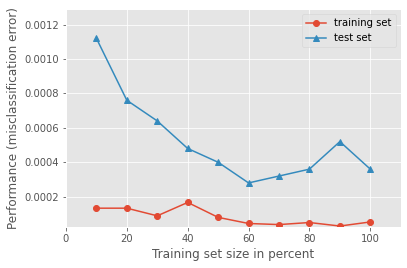

In [37]:
# PLOT LEARNING CURVE TO CHECK FOR ANY OVERFITTING

from mlxtend.plotting import plot_learning_curves

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=None, stratify=y, random_state=0)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()